In [ ]:
!pip install pycoingecko

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pycoingecko import CoinGeckoAPI
from datetime import timedelta
import time
import datetime as dt
import pandas as pd

In [ ]:
cg = CoinGeckoAPI()

data = cg.get_coins_markets('usd')[:34]
ids = list()

for i in data:
  ids.append(i['id'])

print(ids) 

['bitcoin', 'ethereum', 'tether', 'binancecoin', 'usd-coin', 'ripple', 'binance-usd', 'cardano', 'solana', 'dogecoin', 'polkadot', 'wrapped-bitcoin', 'staked-ether', 'tron', 'avalanche-2', 'shiba-inu', 'dai', 'litecoin', 'crypto-com-chain', 'leo-token', 'matic-network', 'near', 'ftx-token', 'bitcoin-cash', 'monero', 'okb', 'stellar', 'chainlink', 'cosmos', 'ethereum-classic', 'flow', 'algorand', 'uniswap', 'apecoin']


In [ ]:
def remove(target_list, remove_list):
  l = target_list

  for i in remove_list:
    idx = l.index(i)
    l.pop(idx)
  
  return l

In [ ]:
ids = remove(ids, ['tether', 'usd-coin', 'binance-usd', 'wrapped-bitcoin', 'staked-ether', 'dai'])
print(ids)

['bitcoin', 'ethereum', 'binancecoin', 'ripple', 'cardano', 'solana', 'dogecoin', 'polkadot', 'tron', 'avalanche-2', 'shiba-inu', 'litecoin', 'crypto-com-chain', 'leo-token', 'matic-network', 'near', 'ftx-token', 'bitcoin-cash', 'monero', 'okb', 'stellar', 'chainlink', 'cosmos', 'ethereum-classic', 'flow', 'algorand', 'uniswap', 'apecoin']


In [ ]:
end = dt.datetime(2022,5,26)
start = end - timedelta(days=85)

start_timestamp = time.mktime(start.timetuple())
end_timestamp = time.mktime(end.timetuple())

In [ ]:
def create_csv(start_date, end_date, list_price, symbol):
  list_date = pd.date_range(start_date, end_date, freq='60min')[:2001]

  if len(list_date) != len(list_price):
    raise Exception(f'Check data length for symbol: {symbol}')
  df = pd.DataFrame({'date': list_date, 'close': list_price})
  df = df.set_index('date')
  df.to_csv(f'/content/STATICS/PRICE/{symbol}.csv')

In [ ]:
len(list_price)

2037

In [ ]:
len(pd.date_range(start, end, freq='60min')[:-3])

2038

In [ ]:
for n in range(len(ids)):
  id = ids[n]

  if n%3 == 0:
    time.sleep(60)

  download = cg.get_coin_market_chart_range_by_id(id, vs_currency='usd', from_timestamp = start_timestamp,
                                                    to_timestamp = end_timestamp)['prices'][:2001]
  list_price = []

  for l in download:
    list_price.append(l[1])

  create_csv(start_date=start, end_date=end, list_price=list_price, symbol=id)


Exception: ignored

In [ ]:
import pandas as pd
import numpy as np
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
import os
from functools import reduce
from statsmodels.tsa.stattools import coint

In [ ]:
file_names.remove('.ipynb_checkpoints')

In [ ]:
sns.set(style='white')

# Retrieve intraday price data and combine them into a DataFrame.
# 1. Load downloaded prices from folder into a list of dataframes.
folder_path = r'/content/STATICS/PRICE'
file_names = os.listdir(folder_path)
tickers = [name.split('.')[0] for name in file_names]
df_list = [pd.read_csv(os.path.join(folder_path, name)) for name in file_names]

In [ ]:
for i in range(len(df_list)):
    df_list[i].rename(columns={'close': tickers[i]}, inplace=True)

In [ ]:
df_list

[                     date  crypto-com-chain
 0     2022-03-02 00:00:00          0.439492
 1     2022-03-02 01:00:00          0.437135
 2     2022-03-02 02:00:00          0.434915
 3     2022-03-02 03:00:00          0.438532
 4     2022-03-02 04:00:00          0.442326
 ...                   ...               ...
 1996  2022-05-24 04:00:00          0.188207
 1997  2022-05-24 05:00:00          0.188173
 1998  2022-05-24 06:00:00          0.187274
 1999  2022-05-24 07:00:00          0.187643
 2000  2022-05-24 08:00:00          0.185936
 
 [2001 rows x 2 columns],                      date  ethereum-classic
 0     2022-03-02 00:00:00         30.361038
 1     2022-03-02 01:00:00         30.093672
 2     2022-03-02 02:00:00         29.915309
 3     2022-03-02 03:00:00         29.989303
 4     2022-03-02 04:00:00         30.458085
 ...                   ...               ...
 1996  2022-05-24 04:00:00         21.987306
 1997  2022-05-24 05:00:00         22.009242
 1998  2022-05-24 06:00:00  

In [ ]:
df  = reduce(lambda x, y: pd.merge(x, y, on='date'), df_list)
idx = round(len(df) * 0.7)
df  = df.iloc[:idx, :]

Text(0.5, 0.98, 'Pearson Correlations')

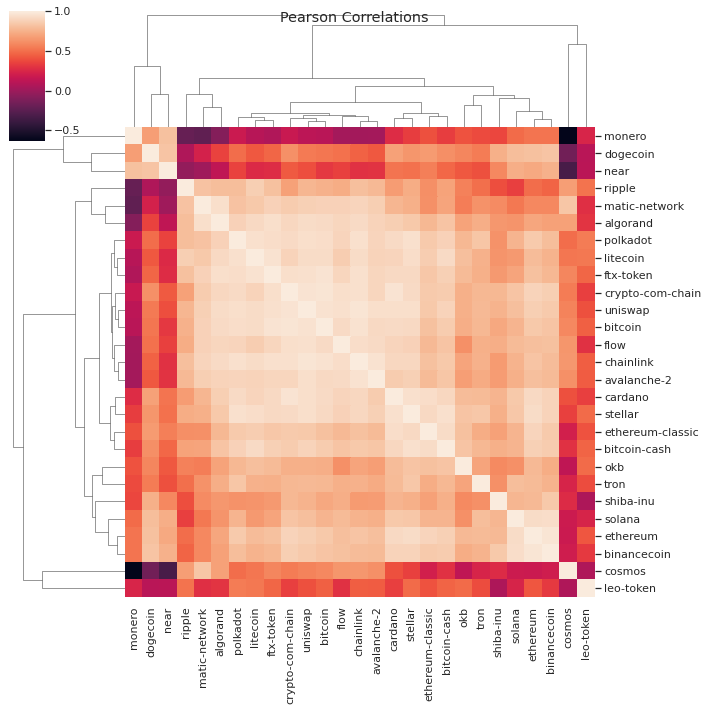

In [ ]:
pearson_corr  = df[tickers].corr()
sns.clustermap(pearson_corr).fig.suptitle('Pearson Correlations')

In [ ]:
sorted_mat = pearson_corr.unstack().sort_values(ascending=False)

print(sorted_mat[20:50])

uniswap           uniswap             1.000000
solana            solana              1.000000
bitcoin           bitcoin             1.000000
avalanche-2       avalanche-2         1.000000
dogecoin          dogecoin            1.000000
litecoin          litecoin            1.000000
tron              tron                1.000000
chainlink         uniswap             0.973494
uniswap           chainlink           0.973494
binancecoin       ethereum            0.972500
ethereum          binancecoin         0.972500
bitcoin           crypto-com-chain    0.972135
crypto-com-chain  bitcoin             0.972135
                  uniswap             0.966024
uniswap           crypto-com-chain    0.966024
ftx-token         bitcoin             0.965487
bitcoin           ftx-token           0.965487
crypto-com-chain  cardano             0.962371
cardano           crypto-com-chain    0.962371
bitcoin           chainlink           0.961698
chainlink         bitcoin             0.961698
ftx-token    

In [ ]:
pair1 = ['bitcoin', 'ftx-token']
pair2 = ['binancecoin', 'ethereum']
pair3 = ['uniswap', 'crypto-com-chain']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


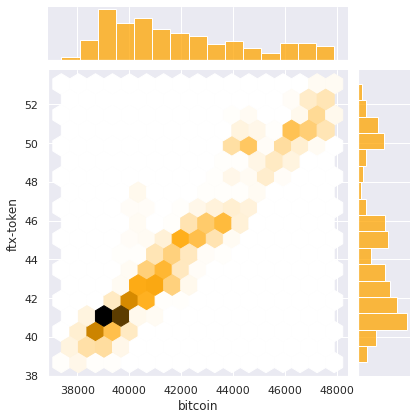

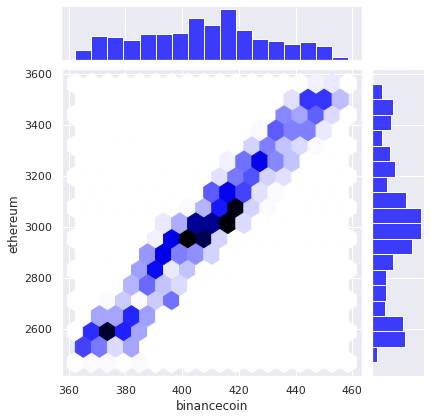

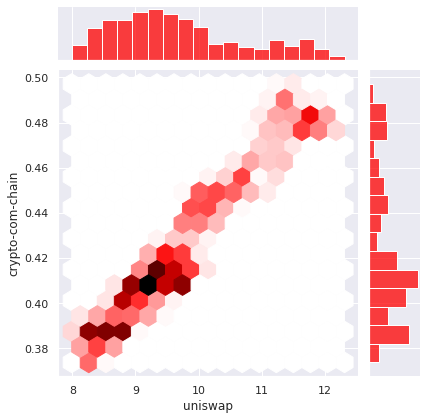

In [ ]:
sns.set(style='darkgrid')
sns.jointplot(df[pair1[0]], df[pair1[1]],  kind='hex', color='orange')
sns.jointplot(df[pair2[0]],  df[pair2[1]], kind='hex', color='blue')
sns.jointplot(df[pair3[0]],  df[pair3[1]], kind='hex', color='red')

In [ ]:
x = df[pair1[0]]
y = df[pair1[1]]
_, p_value, _ = coint(x, y)
print(f'The p_value of {pair1[0]}-{pair1[1]} pair cointegration is: {p_value}')

The p_value of bitcoin-ftx-token pair cointegration is: 0.0006355341855352894


In [ ]:
x = df[pair2[0]]
y = df[pair2[1]]
_, p_value, _ = coint(x, y)
print(f'The p_value of {pair2[0]}-{pair2[1]} pair cointegration is: {p_value}')

The p_value of binancecoin-ethereum pair cointegration is: 0.006961381068476484


In [ ]:
x = df[pair3[0]]
y = df[pair3[1]]
_, p_value, _ = coint(x, y)
print(f'The p_value of {pair3[0]}-{pair3[1]} pair cointegration is: {p_value}')

The p_value of uniswap-crypto-com-chain pair cointegration is: 0.005376037185283005


Text(0.5, 1.0, 'bitcoin-ftx-token Price Relationship')

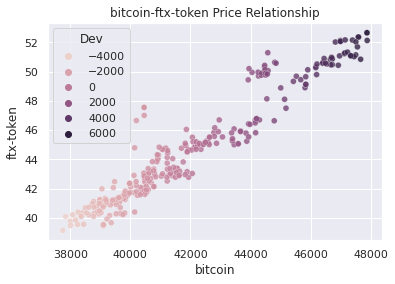

In [ ]:
df2 = df[[pair1[0], pair1[1]]].copy()
spread = df2[pair1[0]] - df2[pair1[1]]
mean_spread = spread.mean()
df2['Dev'] = spread - mean_spread
rnd = np.random.choice(len(df), size=300)
sns.scatterplot(x=pair1[0], y=pair1[1], hue='Dev', linewidth=0.3, alpha=0.8,
                data=df2.iloc[rnd, :]).set_title(f'{pair1[0]}-{pair1[1]} Price Relationship')

Text(0.5, 1.0, 'binancecoin-ethereum Price Relationship')

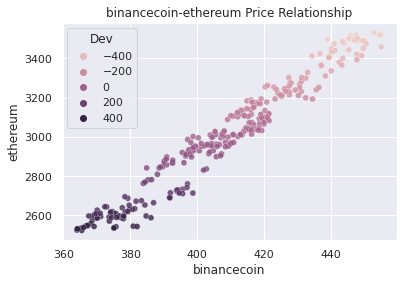

In [ ]:
df2 = df[[pair2[0], pair2[1]]].copy()
spread = df2[pair2[0]] - df2[pair2[1]]
mean_spread = spread.mean()
df2['Dev'] = spread - mean_spread
rnd = np.random.choice(len(df), size=300)
sns.scatterplot(x=pair2[0], y=pair2[1], hue='Dev', linewidth=0.3, alpha=0.8,
                data=df2.iloc[rnd, :]).set_title(f'{pair2[0]}-{pair2[1]} Price Relationship')

Text(0.5, 1.0, 'uniswap-crypto-com-chain Price Relationship')

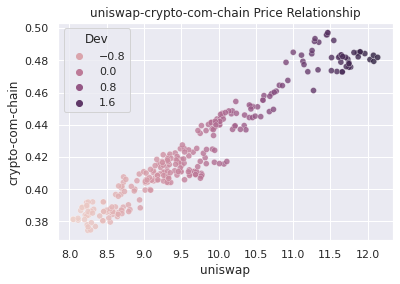

In [ ]:
df2 = df[[pair3[0], pair3[1]]].copy()
spread = df2[pair3[0]] - df2[pair3[1]]
mean_spread = spread.mean()
df2['Dev'] = spread - mean_spread
rnd = np.random.choice(len(df), size=300)
sns.scatterplot(x=pair3[0], y=pair3[1], hue='Dev', linewidth=0.3, alpha=0.8,
                data=df2.iloc[rnd, :]).set_title(f'{pair3[0]}-{pair3[1]} Price Relationship')

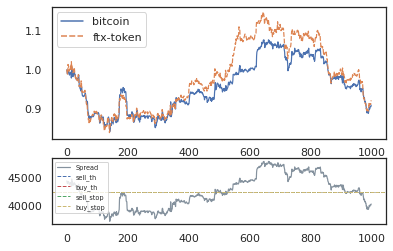

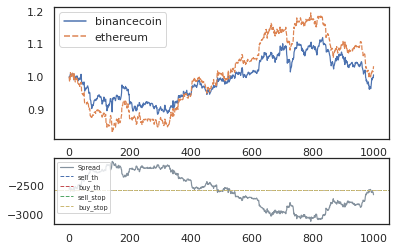

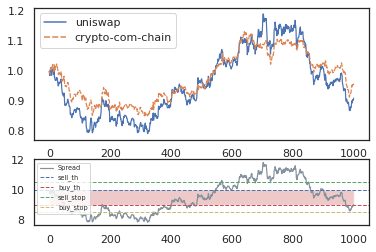

In [ ]:
def plot_spread(df, ticker1, ticker2, idx, th, stop):

    px1 = df[ticker1].iloc[idx] / df[ticker1].iloc[idx[0]]
    px2 = df[ticker2].iloc[idx] / df[ticker2].iloc[idx[0]]

    sns.set(style='white')

    # Set plotting figure
    fig, ax = plt.subplots(2, 1, gridspec_kw={'height_ratios': [2, 1]})

    # Plot the 1st subplot
    sns.lineplot(data=[px1, px2], linewidth=1.2, ax=ax[0])
    ax[0].legend(loc='upper left')

    # Calculate the spread and other thresholds
    spread = df[ticker1].iloc[idx] - df[ticker2].iloc[idx]
    mean_spread = spread.mean()
    sell_th     = mean_spread + th
    buy_th      = mean_spread - th
    sell_stop   = mean_spread + stop
    buy_stop    = mean_spread - stop

    # Plot the 2nd subplot
    sns.lineplot(data=spread, color='#85929E', ax=ax[1], linewidth=1.2)
    ax[1].axhline(sell_th,   color='b', ls='--', linewidth=1, label='sell_th')
    ax[1].axhline(buy_th,    color='r', ls='--', linewidth=1, label='buy_th')
    ax[1].axhline(sell_stop, color='g', ls='--', linewidth=1, label='sell_stop')
    ax[1].axhline(buy_stop,  color='y', ls='--', linewidth=1, label='buy_stop')
    ax[1].fill_between(idx, sell_th, buy_th, facecolors='r', alpha=0.3)
    ax[1].legend(loc='upper left', labels=['Spread', 'sell_th', 'buy_th', 'sell_stop', 'buy_stop'], prop={'size':6.5})

idx = range(1000)
plot_spread(df, pair1[0], pair1[1], idx, 0.5, 1)

idx = range(1000)
plot_spread(df, pair2[0], pair2[1], idx, 0.5, 1)

idx = range(1000)
plot_spread(df, pair3[0], pair3[1], idx, 0.5, 1)